## Programming Questions (Full Mark: 3)

In [1]:
# Do not edit the codes in this cell
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
# load dataset
x, y = load_iris(return_X_y=True)

### - Logistic Regression

In [2]:
# Do not edit the codes in this cell
# We use 100 samples and 2 features for logistic regression function
x_lr = x[:100, :2] # class 0 and 1 balanced
y_lr = y[:100]

In the assignment 2, you have more freedom on your programming design. In this part, you are going to implement your own Logistic Regression function. You need to implement logistic regression with stochastic gradient descent from scratch. The required functions are listed below. You can add more functions as you need. **No library versions of logistic regression are allowed**. 
_________

1. train_test_split

**Randomly** split data into train and test set. 80% of the raw data will be the train set and 20% of the raw data will be the test set.

2. sigmoid

The core of logistic regression

3. predict

Predict an output value for a given x with a set of coefficients. 

4. accurate

Calculate accuracy percentage of the predictions.

5. coef_sgd

Estimate logistic regression coefficients using **stochastic gradient descent**. Using **the cross entropy loss**. Carefully choose learning rate and epochs values.

6. draw_model

Plot the final logistic regression model using the final coefficients and raw datasets. Plot title and xlabel, ylabel are required. Show the plot in the Output.

Print out your **testing accurate**. Is it good? If not, analyze the reason in short. 


trianX: (80, 2) testX: (20, 2) triany: (80,) testy: (20,)
y_pred: [0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1]
Accuracy: 1.0


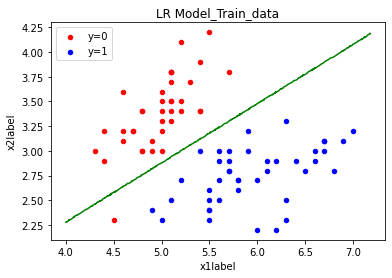

In [6]:
import numpy as np
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

# split to generate train and test
def train_test_split_func(x_lr,y_lr,test_size):
    X_train,X_test,y_train,y_test = train_test_split(x_lr,y_lr,test_size = test_size, random_state = 99)
    print("trianX:",X_train.shape,"testX:",X_test.shape,"triany:",y_train.shape,"testy:",y_test.shape) 
    return X_train, X_test, y_train, y_test

# set a LR model
class LR():
    # get the hy-parameter
    def __init__(self,learning_rate,epoch):
        self.learning_rate = learning_rate
        self.epoch = epoch
    
    # sigmoid func
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    # gradient descent with cross entropy
    def coef_sgd(self,X,y):
        for i in range(self.epoch): 
            tmp_index = np.random.randint(0,X.shape[0]-1)
            ran_x = X[tmp_index]
            res = np.array([ran_x]).dot(self.theta)
            #res = X.dot(self.theta)
            y_pred = self.sigmoid(res)
            # compute the expected y
            #y_pred = self.sigmoid(res)

            # use cross entropy(derivative) to update (stochastic)
            #theta_gradient = X.T.dot(y_pred - y)
            theta_gradient = np.array([ran_x]).T.dot(y_pred - y[tmp_index])
            self.theta = self.theta - self.learning_rate * theta_gradient
            
    #train main func
    def train(self, X, y):
        # get the shape, (80,2)
        samples, features = X.shape
        
        # features + 1 = theta length
        self.theta = [[0] for i in range(features+1)]
        
        # plus one dimention to include b
        X = np.insert(X, 0, 1, axis=1)
        y = np.reshape(y, (samples, 1))
        
        # gradient descent with cross entropy
        self.coef_sgd(X,y)
        
    def predict(self,X):
        # add a dimension
        X = np.insert(X, 0, 1, axis = 1)
        
        # get the calssification
        y_pred = np.round(self.sigmoid(X.dot(self.theta)))
        # turn float to int
        y_pred = y_pred.astype(int)
        return y_pred

    def accurate(self,X_test,y_test):
        y_pred = self.predict(X_test)
        y_pred = np.reshape(y_pred, y_test.shape)
        y_sum = len(y_pred)
        y_true = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                y_true += 1
        return np.round(y_true/y_sum,5)
    
    def pic(self,X_train, X_test, y_train, y_test):
        # draw scatter plot and set the point size
        get_index = []
        get_index_2 = []
        for i in range(len(y_train)):
            if y_train[i] == 0:
                get_index.append(i)
            if y_train[i] == 2:
                get_index_2.append(i)
                
        x1 = [i[0] for i in X_train]
        x2 = [i[1] for i in X_train]
        
        x1_0,x1_1,x1_2,x2_0,x2_1,x2_2 = [],[],[],[],[],[]
        for i in range(len(y_train)):
            if i in get_index:
                x1_0.append(x1[i])
                x2_0.append(x2[i])
            elif i in get_index_2:
                x1_2.append(x1[i])
                x2_2.append(x2[i])              
            else:
                x1_1.append(x1[i])
                x2_1.append(x2[i])                
        y0 = plt.scatter(x1_0, x2_0,color="r",s = 20)
        y1 = plt.scatter(x1_1, x2_1,color="b",s = 20)
        y2 = plt.scatter(x1_2, x2_2,color="y",s = 20)
        
        plt.legend(handles=[y0,y1], labels=['y=0', 'y=1'])
        new_list = []
        x1_r = np.arange(4,7.2,0.01)
        for j in x1_r:
            for i in [np.random.uniform(1, 10) for k in range(1000)]:
                if (np.round(self.sigmoid(np.array([[1,j,i]]).dot(self.theta)),2) == 0.5):
                    new_list.append([j,i])
                    continue
                
        l1 = [i[0] for i in new_list]
        l2 = [i[1] for i in new_list]
        #y1 = plt.scatter(l1, l2,color="g",s = 5)        
        plt.plot(l1,l2,"g")

        # set the label of X and y
        plt.xlabel("x1label")
        plt.ylabel("x2label")

        # set the title of plot 
        plt.title("LR Model_Train_data")

    
#train_test_split
X_train, X_test, y_train, y_test = train_test_split_func(x_lr,y_lr,test_size=0.2)

# set hyper-paramter
learning_rate = 0.1
epoch = 500
# create lr model
LR_model = LR(learning_rate,epoch)
LR_model.train(X_train, y_train)

# predict 
y_pred = LR_model.predict(X_test)
print("y_pred:",np.reshape(y_pred, y_test.shape))

# compute acc
accuracy = LR_model.accurate(X_test,y_test)
print("Accuracy:",accuracy)

#plot the pic
LR_model.pic(X_train, X_test, y_train, y_test)

Answer: It's good! Because we set a high epoch, 500. 

### - Naive Bayes Classifier

In this part, you are going to implement your own naive bayes classifier. 
You need to implement naive bayes classifier from scratch **using the whole imported iris datasets x and y**. The required functions are listed below. You can add more functions as you need. **No library versions of naive bayes classifier are allowed**. 
_________

1. cross_validation_split

**Randomly** split data into 5 folds. That means 30 records will be in each fold.

2. predict

Predict the class label for a given x. 

3. accurate

Calculate accuracy percentage of the predictions. Remember to average the results of k folds

4. gaussian_probability

Calculate the Gaussian probability distribution function for the given x. 

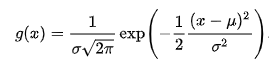


5. class_probability

Calculate the probabilities of predicting each class for a given x using naive bayes algorithm. Be aware that we have multiple input variables. And you may want to use gaussian_probability function here.

*Print out your accuracy result. Is it good? If not, analyze the reason in short. *


In [17]:
import numpy as np
import pandas as pd
from numpy import exp, pi, sqrt


class NaiveBayes_G:
    
    def label_ratio(self,label):
        
        # create a hash table to store the labels and count
        label_dict = {}
        for i in label:
            if i not in label_dict:
                label_dict[i] = 1
            else:
                label_dict[i] += 1
                
        # compute the distribution/ratio
        ratio_list = [label_dict[i] / len(label) for i in range(len(label_dict))]
        ratio = np.array(ratio_list)
        return ratio,len(ratio)
    
    def __init__(self):
        self.ratio = 0
        self.nums = 0
        self.mean = 0
        self.variance = 0

    def fit(self, data, label):
        # Calculate lable ratio.
        self.ratio,self.nums = self.label_ratio(label)

        # Calculate the mean and gaussian func
        self.mean = np.array([data[label == i].mean(axis=0) for i in range(self.nums)])
        self.variance = np.array([data[label == i].var(axis=0) for i in range(self.nums)])

        
    def gaussian_probability(self,row):
        # use gaussian func to calculate the p(x|c)
        return (1 / sqrt(2 * pi * self.variance) * exp(-(row - self.mean)**2 / (2 * self.variance))).prod(axis=1)
    
    def predict(self, X_test):
        # use gaussian func to get the conditional probabilty
        likelihood = np.apply_along_axis(self.gaussian_probability, axis=1, arr=X_test)
        probiblity = self.ratio * likelihood
        
        # get the probability of prediction
        sum_probiblity = probiblity.sum(axis=1)
        div_prob = (probiblity / sum_probiblity[:, None]).argmax(axis=1)
        return div_prob
    
    def class_probability(self, X_test):
        # use gaussian func to get the conditional probabilty
        likelihood = np.apply_along_axis(self.gaussian_probability, axis=1, arr=X_test)
        probiblity = self.ratio * likelihood
        
        # get the probability of prediction
        sum_probiblity = probiblity.sum(axis=1)
        div_prob = np.round((probiblity / sum_probiblity[:, None]),5)
        print(pd.DataFrame(div_prob))
        return div_prob 
    

# compute the accuracy
def accurate(y_test, y_pred):
    y_sum = len(y_pred)
    y_true = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            y_true += 1
    return np.round(y_true/y_sum,5)

# 5folders and one folder is 30, the total is 150
x_lr = x[:150] 
y_lr = y[:150]


    
X_train, X_test, y_train, y_test = train_test_split_func(x_lr,y_lr,test_size=0.2)


model = NaiveBayes_G()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.class_probability(X_test)
accurate = accurate(y_test, y_pred)
print("Accuracy:",accurate)

trianX: (120, 4) testX: (30, 4) triany: (120,) testy: (30,)
      0        1        2
0   0.0  0.00001  0.99999
1   1.0  0.00000  0.00000
2   0.0  0.99776  0.00224
3   0.0  0.00000  1.00000
4   1.0  0.00000  0.00000
5   0.0  0.99996  0.00004
6   0.0  0.98144  0.01856
7   0.0  0.00079  0.99921
8   1.0  0.00000  0.00000
9   0.0  0.13201  0.86799
10  0.0  0.00000  1.00000
11  0.0  0.99918  0.00082
12  0.0  0.08462  0.91538
13  0.0  0.99979  0.00021
14  0.0  0.00000  1.00000
15  1.0  0.00000  0.00000
16  1.0  0.00000  0.00000
17  0.0  0.99977  0.00023
18  0.0  1.00000  0.00000
19  0.0  0.98138  0.01862
20  0.0  0.99165  0.00835
21  0.0  0.93220  0.06780
22  1.0  0.00000  0.00000
23  0.0  1.00000  0.00000
24  0.0  0.00000  1.00000
25  1.0  0.00000  0.00000
26  1.0  0.00000  0.00000
27  0.0  0.00031  0.99969
28  0.0  0.98518  0.01482
29  0.0  0.00000  1.00000
Accuracy: 0.93333
